In [119]:
'''
File name : Data_analysis.ipynb
Author : Group MrJulia
Date created : '03/12/2022'
Python version : 3.6
'''
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import cpi
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import networkx as nx
from itertools import combinations
import plotly
import plotly.graph_objects as go
import plotly.express as px


cmu_folder = './Data/Cmu_data/'
scraping_folder='./Data/Scraping/'
queries_folder='./Data/Queries/'
imdb_folder= './Data/Imdb_data/'
our_folder = './Data/MrJulia_data/'

In [120]:
#read data file of movies scraped and merged with cmu movie corpus 
colnames =  ["Imdb_id","Freebase movie ID","Movie name","Movie release date","release_year","movie_runtime","movie_genres","MBO_revenue","budget","average_rating","num_votes","profit","weighted_rating"]
df_movies = pd.read_csv(our_folder+'df_with_rating.csv',sep=',',names=colnames,skiprows=1)
df_movies['roi']=df_movies['profit']/df_movies['budget']
df_movies['movie_genres']=df_movies['movie_genres'].apply(lambda x : eval(x))
df_movies.head()

,Imdb_id,Freebase movie ID,Movie name,Movie release date,release_year,movie_runtime,movie_genres,MBO_revenue,budget,average_rating,num_votes,profit,weighted_rating,roi
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,97.0,"[Thriller, Crime Thriller, Horror, Psychologic...",4.511683e+07,2.831896e+07,6.6,70424,1.679787e+07,6.397055,0.593167
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,103.0,"[Crime Fiction, Mystery, Horror]",2.404963e+08,1.945688e+07,7.4,344034,2.210394e+08,7.116556,11.360476
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,133.0,"[Thriller, Glamorized Spy Film, Action, Advent...",5.236253e+08,1.721176e+08,6.1,220386,3.515077e+08,6.159714,2.042254
3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,104.0,"[Drama, Indie]",4.882577e+06,1.500000e+07,6.7,46022,-1.011742e+07,6.394890,-0.674495
4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,148.0,"[Thriller, Science Fiction, Adventure, Psychol...",2.925873e+08,1.600000e+08,8.8,2334604,1.325873e+08,8.680734,0.828671


Looking at the top 20 bottom of budgets, we see some very low values. We checked manually for each film if the budget retreived from scraping was correct. We realised that the first 8 values were incorrectly put in the tmdb database except for movie 'Traces of Death' (index 3169). The values were put in millions of dollars unit. 

In [121]:
df_movies.loc[df_movies.budget.sort_values()[:20].index]

,Imdb_id,Freebase movie ID,Movie name,Movie release date,release_year,movie_runtime,movie_genres,MBO_revenue,budget,average_rating,num_votes,profit,weighted_rating,roi
3320,tt0196106,/m/0c_vxv,MVP: Most Valuable Primate,2000-10-20,2000,92.0,"[Children's/Family, Animal Picture, Sports, Ch...",1.266295e+00,5.065180,4.1,2593,-3.798885e+00,6.225815,-7.500000e-01
292,tt0497972,/m/0fg23x,Sex and Death 101,2007-02-08,2007,108.0,"[Romantic comedy, Sex comedy, Drama, Comedy, B...",1.051673e+00,5.258365,5.9,11306,-4.206692e+00,6.240230,-8.000000e-01
3294,tt0214516,/m/03c7hzh,Bad Golf My Way,1994-11-08,1994,50.0,[Comedy],2.059908e+01,10.299541,5.7,98,1.029954e+01,6.272999,1.000000e+00
2910,tt0089424,/m/0sxkh,Kiss of the Spider Woman,1985-05-13,1985,120.0,"[LGBT, Crime Fiction, Indie, World cinema, Pri...",3.446182e+07,22.291970,7.3,16280,3.446180e+07,6.400150,1.545929e+06
3169,tt0108373,/m/068w87,Traces of Death,1993,1993,78.0,"[Horror, Mondo film, Documentary]",3.470788e+02,27.162685,4.0,761,3.199161e+02,6.258610,1.177778e+01
3009,tt0104452,/m/06dwhx,HouseSitter,1992-06-12,1992,101.0,"[Romantic comedy, Romance Film, Screwball come...",1.460960e+02,40.409522,6.1,25424,1.056864e+02,6.242226,2.615385e+00
3157,tt0325537,/m/039lgd,Head of State,2003-03-28,2003,95.0,"[Political cinema, Political satire, Satire, C...",4.576894e+07,41.715061,5.4,20501,4.576889e+07,6.141974,1.097179e+06
2576,tt0109439,/m/08qb0q,City Slickers II: The Legend of Curly's Gold,1994-06-10,1994,116.0,"[Road movie, Action/Adventure, Western, Advent...",6.326861e+01,58.854521,5.6,19897,4.414089e+00,6.174636,7.500000e-02
2924,tt0113394,/m/0cz2yy,The Immortals,1995-09-06,1995,92.0,"[Crime Fiction, Thriller, Gangster Film, Heist...",1.187575e+02,71.540682,5.5,1462,4.721685e+01,6.263828,6.600000e-01
2736,tt0102202,/m/02x6366,Kickboxer 2,1991,1991,88.0,"[Action/Adventure, Martial Arts Film]",2.002388e+06,142.488869,4.5,5925,2.002246e+06,6.187056,1.405194e+04


We fix it manually to avoid the effect of this noisy data on our analysis.

In [122]:
a=df_movies.loc[df_movies.budget.sort_values()[:8].index.drop(3169)] #this film is correct
a['budget'] = a['budget'].apply(lambda x : x*1e6)
a['MBO_revenue'] = a['MBO_revenue'].apply(lambda x : x*1e6 if (x < 1e3 ) else x)
df_movies.loc[df_movies.budget.sort_values()[:8].index.drop(3169)] = a

## Regression analysis

We want to attempt to grasp the effect of the different factors on revenue. Most of our features are continuous variables. The genre is an important feature encoded as a list of string.    
To be able to better use the genre feature, we will use a one hot encoding scheme for each available genre. 
Some characters need to be avoided in order to be able to write patsy code for regression analysis, we will replace them.

In [123]:
df_one_hot=df_movies.copy()
#list all genres a movie belongs to
df1=df_one_hot.explode('movie_genres')
#get catgeorical variable for each available genre
genre_dummies=pd.get_dummies(df1['movie_genres'],prefix='genre').groupby(df1.index).agg(max)
avoid = " /-\[]&'"
new_dummies=[]
for s in genre_dummies.columns :
    for a in avoid :
        #replace characters to avoid for patsy code
        s=s.replace(a,'_').replace("'",'s')
    new_dummies.append(s)
genre_dummies.columns=new_dummies
#new dataframe with correct new categorical genres variables
df_one_hot= pd.concat([df_one_hot, genre_dummies], axis=1)
df_one_hot.head()

,Imdb_id,Freebase movie ID,Movie name,Movie release date,release_year,movie_runtime,movie_genres,MBO_revenue,budget,average_rating,...,genre_Vampire_movies,genre_War_film,genre_Werewolf_fiction,genre_Western,genre_Whodunit,genre_Women_in_prison_films,genre_Workplace_Comedy,genre_World_cinema,genre_Wuxia,genre_Zombie_Film
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,97.0,"[Thriller, Crime Thriller, Horror, Psychologic...",4.511683e+07,2.831896e+07,6.6,...,0,0,0,0,0,0,0,0,0,0
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,103.0,"[Crime Fiction, Mystery, Horror]",2.404963e+08,1.945688e+07,7.4,...,0,0,0,0,0,0,0,0,0,0
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,133.0,"[Thriller, Glamorized Spy Film, Action, Advent...",5.236253e+08,1.721176e+08,6.1,...,0,0,0,0,0,0,0,0,0,0
3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,104.0,"[Drama, Indie]",4.882577e+06,1.500000e+07,6.7,...,0,0,0,0,0,0,0,0,0,0
4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,148.0,"[Thriller, Science Fiction, Adventure, Psychol...",2.925873e+08,1.600000e+08,8.8,...,0,0,0,0,0,0,0,0,0,0


In this section, we perform linear regression on the genres, budget, release year and movie runtime choosing as our measure of financial succes the Movie box office revenue since we also want to grasp effect of budget.

In [124]:
def perform_multi_linear_reg(genres,other_vars=['budget', 'release_year', 'movie_runtime'],dependent_variable='MBO_revenue'):
    '''
    Given a list of genres as categorical variables and other variables, performs
    linear regression on the data 
    param: genres : list of genres to consider
    others_vars : others continuous variables
    dependent_var : variable to be predicted
    returns : result of the fitted linear regression model
    '''
    
    df = df_one_hot.drop('movie_genres', axis=1)
    
    #standardize continuous inputs 
    for var in other_vars :
        df[var]=(df[var]-df[var].mean())/df[var].std()
        
    #standardize continuous 
    df[dependent_variable]=(df[dependent_variable]-df[dependent_variable].mean())/df[dependent_variable].std()

    # Specify the featurs 
    features = genres + other_vars 

    # Fit the linear regression model
    model = smf.ols(f"{dependent_variable} ~ {' + '.join(other_vars)} + C({') + C('.join(genres)})", data=df)
    res = model.fit()
    return res,df

In [125]:
genres = genre_dummies.columns.to_list() 
res,df_reg = perform_multi_linear_reg(genres)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MBO_revenue   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     8.805
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.14e-227
Time:                        22:12:04   Log-Likelihood:                -3847.9
No. Observations:                3376   AIC:                             8226.
Df Residuals:                    3111   BIC:                             9849.
Df Model:                         264                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -0.2240      0.049     -4.574      0.000      -0.320      -0.128
C(genre_Absurdism)[T.1]                                    0.4194      0.161      2.600      0.009       0.103       0.736
C(genre_Acid_western)[T.1]                                 0.3978      0.596      0.668      0.504      -0.771       1.566
C(genre_Action)[T.1]                                       0.1132      0.053      2.155      0.031       0.010       0.216
C(genre_Action_Comedy)[T.1]                                0.1696      0.130      1.304      0.192      -0.085       0.424
C(genre_Action_Thrillers)[T.1]                             0.0932      0.084      1.104      0.269      -0.072       0.259
C(genre_Action_Adventure)[T.1]                            -0.0720      0.055     -1.301      0.193      -0.180       0.037
C(genre_Addiction_Drama)[T.1]                             -0.1755      0.309     -0.567      0.571      -0.782       0.431
C(genre_Adventure)[T.1]                                    0.0092      0.052      0.176      0.860      -0.093       0.111
C(genre_Adventure_Comedy)[T.1]                             0.1048      0.153      0.687      0.492      -0.194       0.404
C(genre_Airplanes_and_airports)[T.1]                       0.2951      0.167      1.771      0.077      -0.032       0.622
C(genre_Albino_bias)[T.1]                                  0.1325      0.296      0.448      0.654      -0.448       0.713
C(genre_Alien_Film)[T.1]                                   0.1918      0.195      0.982      0.326      -0.191       0.575
C(genre_Alien_invasion)[T.1]                               0.1822      0.877      0.208      0.835      -1.537       1.902
C(genre_Americana)[T.1]                                   -0.0120      0.165     -0.073      0.942      -0.335       0.311
C(genre_Animal_Picture)[T.1]                              -0.0265      0.202     -0.131      0.896      -0.423       0.370
C(genre_Animated_Musical)[T.1]                             0.2573      0.645      0.399      0.690      -1.008       1.522
C(genre_Animation)[T.1]                                   -0.3339      0.192     -1.743      0.081      -0.709       0.042
C(genre_Anime)[T.1]                                       -0.1313      0.503     -0.261      0.794      -1.117       0.855
C(genre_Anthology)[T.1]                                   -0.4082      0.807     -0.506      0.613      -1.990       1.174
C(genre_Anti_war)[T.1]                                     0.4043      0.176      2.302      0.021       0.060       0.749
C(genre_Anti_war_film)[T.1]                                0.4043      0.176      2.302      0.021       0.060       0.749
C(genre_

From the performed regression model :    
-We get a high R squared value : 0.428. This is a good value for the explained variance of the model.    
-budget and movie_runtime influence positively the revenue while release year had a moderate negative effect. This can be explained by the fact that a recent movie is more keen to be held on cinemas.   
-The budget is the continous variable that influences the mspt. However some categories seem to influence way too much. For    example 'Epic_Western' genre influences nearly thrice as the budget, which is odd.    
-The model tells us that there a strong multicollinearity problems in the features. This explains some odd coefficients in    genres.            

In [126]:
df_one_hot[df_one_hot.genre_Epic_Western==1]

,Imdb_id,Freebase movie ID,Movie name,Movie release date,release_year,movie_runtime,movie_genres,MBO_revenue,budget,average_rating,...,genre_Vampire_movies,genre_War_film,genre_Werewolf_fiction,genre_Western,genre_Whodunit,genre_Women_in_prison_films,genre_Workplace_Comedy,genre_World_cinema,genre_Wuxia,genre_Zombie_Film
831,tt0099348,/m/0y_9q,Dances with Wolves,1990-10-19,1990,224.0,"[Adventure, Epic Western, Costume drama, India...",7.077374e+08,3.670415e+07,8.0,...,0,1,0,1,0,0,0,0,0,0
2787,tt0107004,/m/0c_3nd,Geronimo: An American Legend,1993-12-10,1993,115.0,"[Epic Western, Indian Western, Period piece, A...",2.812186e+07,5.281633e+07,6.5,...,0,0,0,1,0,0,0,0,0,0


There is only 2 movies for this genre, we thus need to choose a subset of genres.      
To understand our collinearity problem, we compute the variance inflation factor for our features.    

In [127]:
vif = { genres[i] : variance_inflation_factor(df_reg[genres].values, i) for i in range(df_reg[genres].shape[1]) }
vif = { name : vif[name] for name in sorted(vif,key=vif.get, reverse=True) }

C:\Users\Aouame\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in double_scalars



The Variance inflation factor can be interpreted as follows :     
-VIF equal to 1 = variables are not correlated.       
-VIF between 1 and 5 = variables are moderately correlated.        
-VIF greater than 5 = variables are highly correlated.    

In [128]:
vif1=dict((k, v) for k, v in vif.items() if v > 5)
vif1

{'genre_Anti_war': inf,
 'genre_Anti_war_film': inf,
 'genre_Epic_Western': inf,
 'genre_Gay': inf,
 'genre_Gay_Interest': inf,
 'genre_Gross_out': inf,
 'genre_Gross_out_film': inf,
 'genre_Indian_Western': inf,
 'genre_Gay_Themed': 6.845572346511883}

The genres are highly correlated with other features. We will try to choose a final subset of genres thourgh multiple steps while trying to loose as less information as possible.

***First approach: Merging similar genres to reduce colinearity***

We will try to merge more specific genres to more general one. This matching algorithm performs the matching and produces a pair of matches. The first element is the more specific genre (to be deleted later) while the second one will get hold its information.

In [129]:
matches = list()
#genres to be considered
genres=genre_dummies.columns
#this genre is too general
avoid='genre_Film'
#for each genre
for x_name in genres :
    #for each word in this genre without the 'genre_' prefix
    for xi in x_name[6:].split('_') :
        #compare with each other genre
        for y_name in genres :
            #remove superficial words
            y_subset = y_name.replace('_Film','').replace('_film','')
            #don't match a genre to itself
            if(x_name!= y_name) :
                #if the genre is less specific, try to make a match
                if (len(y_subset[6:].split('_'))==1 and len(x_name[6:].split('_'))!=1) :
                    #matching can be done if the word is a principal word in the second genre
                    if(xi.lower() == y_subset[6:].split('_')[0].lower() and y_name!=avoid) :
                        matches.append([x_name,y_name])
matches

[['genre_Acid_western', 'genre_Western'],
 ['genre_Action_Comedy', 'genre_Action'],
 ['genre_Action_Comedy', 'genre_Comedy'],
 ['genre_Action_Comedy', 'genre_Comedy_film'],
 ['genre_Action_Thrillers', 'genre_Action'],
 ['genre_Action_Adventure', 'genre_Action'],
 ['genre_Action_Adventure', 'genre_Adventure'],
 ['genre_Addiction_Drama', 'genre_Drama'],
 ['genre_Adventure_Comedy', 'genre_Adventure'],
 ['genre_Adventure_Comedy', 'genre_Comedy'],
 ['genre_Adventure_Comedy', 'genre_Comedy_film'],
 ['genre_Alien_invasion', 'genre_Alien_Film'],
 ['genre_Animated_Musical', 'genre_Musical'],
 ['genre_Anti_war', 'genre_War_film'],
 ['genre_Anti_war_film', 'genre_War_film'],
 ['genre_Black_comedy', 'genre_Comedy'],
 ['genre_Black_comedy', 'genre_Comedy_film'],
 ['genre_Buddy_cop', 'genre_Buddy_film'],
 ['genre_Childhood_Drama', 'genre_Drama'],
 ['genre_Childrenss_Fantasy', 'genre_Childrenss'],
 ['genre_Childrenss_Fantasy', 'genre_Fantasy'],
 ['genre_Childrenss_Family', 'genre_Childrenss'],
 ['gen

In [130]:
#sort our matches so that matches to less specific genres are first in the list
#For example, some genres xis are mapped to Comedy_film, and the latter is mapped to Comedy
#This will allow us to first save the xis information into Comedy_film before saving the latter to Comedy genre
matches.sort(key=lambda s: len(s[1]),reverse=True)
matches

[['genre_Action_Comedy', 'genre_Comedy_film'],
 ['genre_Adventure_Comedy', 'genre_Comedy_film'],
 ['genre_Black_comedy', 'genre_Comedy_film'],
 ['genre_Childrenss_Family', 'genre_Family_Film'],
 ['genre_Comedy_Thriller', 'genre_Comedy_film'],
 ['genre_Comedy_Western', 'genre_Comedy_film'],
 ['genre_Comedy_horror', 'genre_Comedy_film'],
 ['genre_Comedy_of_Errors', 'genre_Comedy_film'],
 ['genre_Comedy_of_manners', 'genre_Comedy_film'],
 ['genre_Comedy_drama', 'genre_Comedy_film'],
 ['genre_Courtroom_Comedy', 'genre_Comedy_film'],
 ['genre_Crime_Comedy', 'genre_Comedy_film'],
 ['genre_Domestic_Comedy', 'genre_Comedy_film'],
 ['genre_Family_Drama', 'genre_Family_Film'],
 ['genre_Family_Oriented_Adventure', 'genre_Family_Film'],
 ['genre_Fantasy_Comedy', 'genre_Comedy_film'],
 ['genre_Heavenly_Comedy', 'genre_Comedy_film'],
 ['genre_Horror_Comedy', 'genre_Comedy_film'],
 ['genre_Musical_comedy', 'genre_Comedy_film'],
 ['genre_Romantic_comedy', 'genre_Comedy_film'],
 ['genre_Screwball_comed

In [131]:
def merge(d,matches) :
    '''
    Given a dataframe containing categorical genres columns and list of matched pairs,
    saves information from first element to second element of the pair.
    param: d: dataframe to perform merge on
    matches : list of matches to consider for merging
    returns : updated dataframe
    '''
    for x in matches :
        d[x[1]] = max(d[x[0]],d[x[1]])
    return d

In [132]:
#save deleted genres
drop=pd.DataFrame()
merged_genre_dummies=genre_dummies.copy()
#perform merging
merged_genre_dummies=merged_genre_dummies.apply(lambda x : merge(x,matches),axis=1)
for x in matches :
    if x[0] in merged_genre_dummies.columns :
        #deleted merged genre and update the genres list
        drop=pd.concat([drop,merged_genre_dummies[x[0]]],axis=1)
        merged_genre_dummies=merged_genre_dummies.drop(x[0],axis=1)

In [133]:
print('We went from '+str(len(genre_dummies.columns))+' to '+str(len(merged_genre_dummies.columns))+' genres')

We went from 265 to 173 genres


***Second approach : remove remaining highly collinear genres***

In [134]:
genres = merged_genre_dummies.columns.to_list() 
res,df_reg = perform_multi_linear_reg(genres)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MBO_revenue   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     12.20
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          1.83e-243
Time:                        22:12:47   Log-Likelihood:                -3927.0
No. Observations:                3376   AIC:                             8206.
Df Residuals:                    3200   BIC:                             9284.
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -0.1858      0.046     -4.018      0.000      -0.277      -0.095
C(genre_Absurdism)[T.1]                                    0.3803      0.160      2.374      0.018       0.066       0.694
C(genre_Action)[T.1]                                       0.1124      0.042      2.683      0.007       0.030       0.194
C(genre_Adventure)[T.1]                                    0.0187      0.049      0.380      0.704      -0.078       0.115
C(genre_Airplanes_and_airports)[T.1]                       0.2764      0.166      1.668      0.095      -0.049       0.601
C(genre_Albino_bias)[T.1]                                  0.1895      0.293      0.647      0.518      -0.385       0.764
C(genre_Alien_Film)[T.1]                                   0.2094      0.187      1.117      0.264      -0.158       0.577
C(genre_Americana)[T.1]                                   -0.0050      0.164     -0.030      0.976      -0.327       0.317
C(genre_Animal_Picture)[T.1]                              -0.0727      0.191     -0.380      0.704      -0.448       0.302
C(genre_Animation)[T.1]                                   -0.3492      0.173     -2.020      0.043      -0.688      -0.010
C(genre_Anime)[T.1]                                       -0.1276      0.491     -0.260      0.795      -1.091       0.835
C(genre_Anthology)[T.1]                                   -0.3398      0.802     -0.424      0.672      -1.912       1.233
C(genre_Apocalyptic_and_post_apocalyptic_fiction)[T.1]     0.0888      0.264      0.336      0.737      -0.429       0.607
C(genre_Archaeology)[T.1]                                  0.8576      0.827      1.037      0.300      -0.764       2.479
C(genre_Archives_and_records)[T.1]                         0.4442      0.587      0.757      0.449      -0.707       1.595
C(genre_Art_film)[T.1]                                     0.2569      0.867      0.296      0.767      -1.443       1.957
C(genre_Auto_racing)[T.1]                                  0.2231      0.293      0.761      0.447      -0.352       0.798
C(genre_Avant_garde)[T.1]                                 -0.2000      0.620     -0.323      0.747      -1.415       1.015
C(genre_B_movie)[T.1]                                     -0.1666      0.202     -0.823      0.411      -0.564       0.230
C(genre_Baseball)[T.1]                                     0.1276      0.370      0.345      0.730      -0.598       0.853
C(genre_Beach_Film)[T.1]                                  -0.1568      0.567     -0.277      0.782      -1.268       0.955
C(genre_Biker_Film)[T.1]                                  -0.1119      0.570     -0.196      0.844      -1.230       1.006
C(genre_

The R squared value dropped (logically) as well as the collinearity. There remains still some collinearity in the features.

In [135]:
vif = { genres[i] : variance_inflation_factor(df_reg[genres].values, i) for i in range(df_reg[genres].shape[1]) }
vif = { name : vif[name] for name in sorted(vif,key=vif.get, reverse=True) }

C:\Users\Aouame\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in double_scalars



In [136]:
vif1=dict((k, v) for k, v in vif.items() if v > 5)
vif1

{'genre_Gross_out': inf, 'genre_Gross_out_film': inf}

There remains two genres that did not get merged and are highly correlated with others, we will delete their columns.

In [137]:
drop=vif1.keys()
san_genre_dummies=merged_genre_dummies.copy()
san_genre_dummies=san_genre_dummies.drop(drop,axis=1)
san_genre_dummies

,genre_Absurdism,genre_Action,genre_Adventure,genre_Airplanes_and_airports,genre_Albino_bias,genre_Alien_Film,genre_Americana,genre_Animal_Picture,genre_Animation,genre_Anime,...,genre_Tragedy,genre_Tragicomedy,genre_Vampire_movies,genre_War_film,genre_Werewolf_fiction,genre_Western,genre_Whodunit,genre_World_cinema,genre_Wuxia,genre_Zombie_Film
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
print('We went from '+str(len(merged_genre_dummies.columns))+' to '+str(len(san_genre_dummies.columns))+' genres')

We went from 173 to 171 genres


From the regression, we see that Vampire Movies have really high coefficient (4) which is odd ,same for Point of view shot (2).
    

In [139]:
df_one_hot[df_one_hot['genre_Vampire_movies']==1]

,Imdb_id,Freebase movie ID,Movie name,Movie release date,release_year,movie_runtime,movie_genres,MBO_revenue,budget,average_rating,...,genre_Vampire_movies,genre_War_film,genre_Werewolf_fiction,genre_Western,genre_Whodunit,genre_Women_in_prison_films,genre_Workplace_Comedy,genre_World_cinema,genre_Wuxia,genre_Zombie_Film
518,tt1325004,/m/075wx7_,Eclipse,2010-06-24,2010,124.0,"[Thriller, Science Fiction, Vampire movies, Ho...",698491347.0,68000000.0,5.0,...,1,0,0,0,0,0,0,0,0,0


In [140]:
df_one_hot[df_one_hot['genre_Point_of_view_shot']==1]

,Imdb_id,Freebase movie ID,Movie name,Movie release date,release_year,movie_runtime,movie_genres,MBO_revenue,budget,average_rating,...,genre_Vampire_movies,genre_War_film,genre_Werewolf_fiction,genre_Western,genre_Whodunit,genre_Women_in_prison_films,genre_Workplace_Comedy,genre_World_cinema,genre_Wuxia,genre_Zombie_Film
701,tt0185937,/m/07byq,The Blair Witch Project,1999-01-25,1999,105.0,"[Horror, Indie, Supernatural, Cult, Mystery, A...",3.254337e+08,78531.572629,6.5,...,0,0,0,0,0,0,0,0,0,0


These 2 genres concern only a single movie each. We need to adress low density genres.

***Third approach, group low density genres together in one category***

In [141]:
drop=san_genre_dummies.sum().sort_values()
#we will drop all genres concerning less than 150 movies
thresh_hold=150
drop=drop[drop<thresh_hold]
#sum up their information into one new category
other= san_genre_dummies[drop.index].agg(sum,axis=1).rename('genre_other').apply(lambda x : 1 if x>1 else x ).astype(int)
san_genre_dummies=san_genre_dummies.drop(drop.index,axis=1)
san_genre_dummies = pd.concat([san_genre_dummies,other],axis=1)
#update initial df with new category
df_one_hot=df_movies.copy()
df_one_hot= pd.concat([df_movies, san_genre_dummies], axis=1)
df_one_hot.head()

,Imdb_id,Freebase movie ID,Movie name,Movie release date,release_year,movie_runtime,movie_genres,MBO_revenue,budget,average_rating,...,genre_Mystery,genre_Parody,genre_Period_piece,genre_Romance_Film,genre_Science_Fiction,genre_Supernatural,genre_Suspense,genre_Teen,genre_Thriller,genre_other
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,97.0,"[Thriller, Crime Thriller, Horror, Psychologic...",4.511683e+07,2.831896e+07,6.6,...,0,0,0,0,0,0,1,0,1,0
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,103.0,"[Crime Fiction, Mystery, Horror]",2.404963e+08,1.945688e+07,7.4,...,1,0,0,0,0,0,0,0,0,0
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,133.0,"[Thriller, Glamorized Spy Film, Action, Advent...",5.236253e+08,1.721176e+08,6.1,...,0,0,0,0,0,0,0,0,1,1
3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,104.0,"[Drama, Indie]",4.882577e+06,1.500000e+07,6.7,...,0,0,0,0,0,0,0,0,0,0
4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,148.0,"[Thriller, Science Fiction, Adventure, Psychol...",2.925873e+08,1.600000e+08,8.8,...,1,0,0,0,1,0,0,0,1,0


In [142]:
print('We now have '+ str(len(san_genre_dummies.columns))+ ' genres')

We now have 23 genres


We want to restrict our subset to contain 20 genres, for this will perform a Recursive Feature Elimination algorithm to target the 20 best genres that describe our data.

In [143]:
# Load the data into a pandas DataFrame
features_to_drop = df_one_hot.columns.drop(san_genre_dummies.columns).drop(['MBO_revenue'])
df = df_one_hot.drop(columns=features_to_drop)

# Specify the dependent variable
y = df['MBO_revenue']

# Create a Linear Regression model
lr = LinearRegression()

# Use RFE to select the top 20 variables
rfe = RFE(lr, n_features_to_select=20)

# Fit the RFE model to the data
df=df.drop('MBO_revenue', axis=1)
rfe.fit(df, y)

# Print the top 20 features
print(df.columns[rfe.support_])

Index(['genre_Action', 'genre_Adventure', 'genre_Buddy_film',
       'genre_Coming_of_age', 'genre_Crime', 'genre_Cult', 'genre_Family_Film',
       'genre_Fantasy', 'genre_Film_adaptation', 'genre_Horror', 'genre_Indie',
       'genre_Mystery', 'genre_Parody', 'genre_Period_piece',
       'genre_Romance_Film', 'genre_Science_Fiction', 'genre_Suspense',
       'genre_Teen', 'genre_Thriller', 'genre_other'],
      dtype='object')


In [144]:
drop=san_genre_dummies.drop(san_genre_dummies[df.columns[rfe.support_]],axis=1)
#updating the genre list
san_genre_dummies=san_genre_dummies[df.columns[rfe.support_]]
#update the dataframe to keep the 20 best genres
df_one_hot= df_one_hot.drop(drop,axis=1)
df_one_hot.head()

,Imdb_id,Freebase movie ID,Movie name,Movie release date,release_year,movie_runtime,movie_genres,MBO_revenue,budget,average_rating,...,genre_Indie,genre_Mystery,genre_Parody,genre_Period_piece,genre_Romance_Film,genre_Science_Fiction,genre_Suspense,genre_Teen,genre_Thriller,genre_other
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,97.0,"[Thriller, Crime Thriller, Horror, Psychologic...",4.511683e+07,2.831896e+07,6.6,...,0,0,0,0,0,0,1,0,1,0
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,103.0,"[Crime Fiction, Mystery, Horror]",2.404963e+08,1.945688e+07,7.4,...,0,1,0,0,0,0,0,0,0,0
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,133.0,"[Thriller, Glamorized Spy Film, Action, Advent...",5.236253e+08,1.721176e+08,6.1,...,0,0,0,0,0,0,0,0,1,1
3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,104.0,"[Drama, Indie]",4.882577e+06,1.500000e+07,6.7,...,1,0,0,0,0,0,0,0,0,0
4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,148.0,"[Thriller, Science Fiction, Adventure, Psychol...",2.925873e+08,1.600000e+08,8.8,...,0,1,0,0,0,1,0,0,1,0


***Now , we can peform our final linear regression.***

In [145]:
genres = san_genre_dummies.columns.to_list() 
res,df_reg = perform_multi_linear_reg(genres)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MBO_revenue   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     74.93
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          8.18e-281
Time:                        22:13:01   Log-Likelihood:                -4089.6
No. Observations:                3376   AIC:                             8227.
Df Residuals:                    3352   BIC:                             8374.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.1097      0.036     -3.047      0.002      -0.180      -0.039
C(genre_Action)[T.1]              0.0968      0.051      1.891      0.059      -0.004       0.197
C(genre_Adventure)[T.1]          -0.0351      0.050     -0.698      0.485      -0.134       0.063
C(genre_Buddy_film)[T.1]          0.2392      0.069      3.480      0.001       0.104       0.374
C(genre_Coming_of_age)[T.1]       0.0176      0.067      0.261      0.794      -0.114       0.150
C(genre_Crime)[T.1]              -0.0321      0.039     -0.823      0.411      -0.108       0.044
C(genre_Cult)[T.1]               -0.0215      0.066     -0.323      0.747      -0.152       0.109
C(genre_Family_Film)[T.1]         0.1477      0.051      2.871      0.004       0.047       0.249
C(genre_Fantasy)[T.1]             0.0861      0.051      1.692      0.091      -0.014       0.186
C(genre_Film_adaptation)[T.1]    -0.0054      0.050     -0.109      0.913      -0.103       0.092
C(genre_Horror)[T.1]              0.1300      0.048      2.690      0.007       0.035       0.225
C(genre_Indie)[T.1]              -0.0681      0.043     -1.601      0.110      -0.152       0.015
C(genre_Mystery)[T.1]             0.0484      0.051      0.941      0.347      -0.052       0.149
C(genre_Parody)[T.1]             -0.0239      0.067     -0.356      0.722      -0.156       0.108
C(genre_Period_piece)[T.1]       -0.1941      0.051     -3.784      0.000      -0.295      -0.094
C(genre_Romance_Film)[T.1]        0.2164      0.038      5.768      0.000       0.143       0.290
C(genre_Science_Fiction)[T.1]    -0.0698      0.048     -1.439      0.150      -0.165       0.025
C(genre_Suspense)[T.1]            0.1497      0.067      2.234      0.026       0.018       0.281
C(genre_Teen)[T.1]                0.0837      0.059      1.419      0.156      -0.032       0.199
C(genre_Thriller)[T.1]            0.0080      0.040      0.200      0.842      -0.071       0.087
C(genre_other)[T.1]               0.0203      0.030      0.672      0.502      -0.039       0.079
budget                            0.5412      0.017     31.130      0.000       0.507       0.575
release_year                     -0.0666      0.014     -4.594      0.000      -0.095      -0.038
movie_runtime                     0.0648      0.016      4.174      0.000       0.034       0.095
==============================================================================
Omnibus:                     2187.599   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35889.551
Skew:                           2.839   Prob(JB):                         0.00
Kurtosis:                      17.929   Cond. No.                         7.73
==========================================

From the above regression, we see that : 
- Our R squared value is 0,340, which is a meaningful value to explain variance of the data
- Some of the genres positively affect the revenue while some do negatively
- The coefficient associated to budget is the biggest (as expected) 

We will try to summarize the relations between the features and their effect on revenue in a plot, taking into account confidence intervals

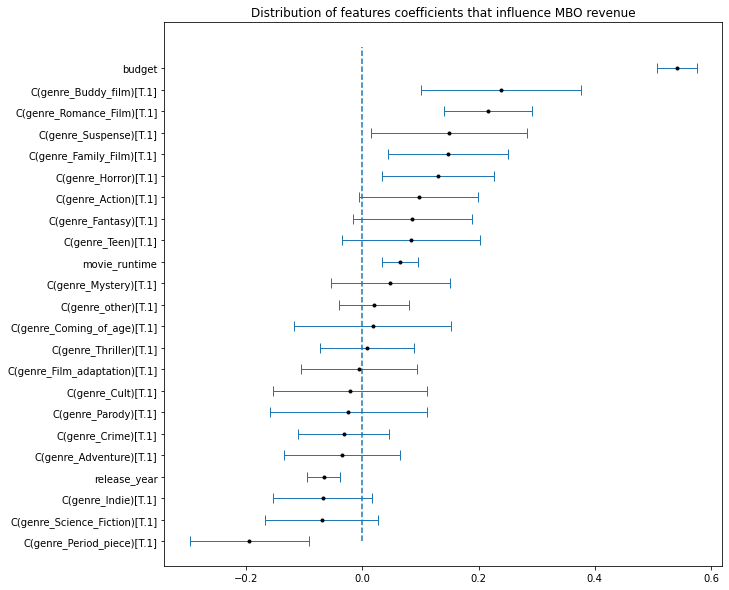

In [146]:
variables = res.params.index
coefficients = res.params.values
p_values = res.pvalues
standard_errors = res.bse.values

plt.figure(figsize=(10,10))
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))
plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')
plt.title('Distribution of features coefficients that influence MBO revenue')
plt.yticks(range(len(l2)),l2);

Now that we encoded our movie_genres features and that we estimated the effect of the different features on the revenue, we want to look for the best combinations of genres present in successfull movie.    
The success metric this time will be the return on investment to select a subset of movies that at least cashed back double their budget. We will try to make an interactive visualization as well. However, it would not appear in the executed notebook (unless ran manually) due to the use of plotly library. We will append it in our repository.   

## Visualization of the best pairs of genres of successful movies

In [147]:
#taking the top movies that at least doubles their budget (i.e Return on of investement at least 2 since the ROI is Profit/Budget)and sorting by decreasing order
df1= df_one_hot.copy()
df1 = df1.sort_values(by=['roi'], ascending=False)
df1 = df1[df1.roi>=2.0]
used_later=df1.copy()

In [148]:
genre_dummies = df1.drop(colnames, axis=1).drop(columns=['roi'])
genre_dummies.head()

,genre_Action,genre_Adventure,genre_Buddy_film,genre_Coming_of_age,genre_Crime,genre_Cult,genre_Family_Film,genre_Fantasy,genre_Film_adaptation,genre_Horror,genre_Indie,genre_Mystery,genre_Parody,genre_Period_piece,genre_Romance_Film,genre_Science_Fiction,genre_Suspense,genre_Teen,genre_Thriller,genre_other
2910,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2736,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
701,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1
3261,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [149]:
movies_top_profit = df1
#selecting the top movies genres features
movies_top_profit = movies_top_profit[genre_dummies.columns.values]
print(len(movies_top_profit))
movies_top_profit.head()

926


,genre_Action,genre_Adventure,genre_Buddy_film,genre_Coming_of_age,genre_Crime,genre_Cult,genre_Family_Film,genre_Fantasy,genre_Film_adaptation,genre_Horror,genre_Indie,genre_Mystery,genre_Parody,genre_Period_piece,genre_Romance_Film,genre_Science_Fiction,genre_Suspense,genre_Teen,genre_Thriller,genre_other
2910,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2736,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
701,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1
3261,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [150]:
#create a combination of pairs of genres
feats = movies_top_profit.columns.to_list()
top20_comb = list(combinations(feats, 2))
genre_pair_counts = {pair: 0 for pair in top20_comb }

In [151]:
#assign number to genres
dict_1genre = dict(zip(feats,range(20)))
dict_1genre

{'genre_Action': 0,
 'genre_Adventure': 1,
 'genre_Buddy_film': 2,
 'genre_Coming_of_age': 3,
 'genre_Crime': 4,
 'genre_Cult': 5,
 'genre_Family_Film': 6,
 'genre_Fantasy': 7,
 'genre_Film_adaptation': 8,
 'genre_Horror': 9,
 'genre_Indie': 10,
 'genre_Mystery': 11,
 'genre_Parody': 12,
 'genre_Period_piece': 13,
 'genre_Romance_Film': 14,
 'genre_Science_Fiction': 15,
 'genre_Suspense': 16,
 'genre_Teen': 17,
 'genre_Thriller': 18,
 'genre_other': 19}

In [152]:
#assign numbers to pairs of genres
dict_2genres = dict(enumerate(top20_comb))
dict_2genres

{0: ('genre_Action', 'genre_Adventure'),
 1: ('genre_Action', 'genre_Buddy_film'),
 2: ('genre_Action', 'genre_Coming_of_age'),
 3: ('genre_Action', 'genre_Crime'),
 4: ('genre_Action', 'genre_Cult'),
 5: ('genre_Action', 'genre_Family_Film'),
 6: ('genre_Action', 'genre_Fantasy'),
 7: ('genre_Action', 'genre_Film_adaptation'),
 8: ('genre_Action', 'genre_Horror'),
 9: ('genre_Action', 'genre_Indie'),
 10: ('genre_Action', 'genre_Mystery'),
 11: ('genre_Action', 'genre_Parody'),
 12: ('genre_Action', 'genre_Period_piece'),
 13: ('genre_Action', 'genre_Romance_Film'),
 14: ('genre_Action', 'genre_Science_Fiction'),
 15: ('genre_Action', 'genre_Suspense'),
 16: ('genre_Action', 'genre_Teen'),
 17: ('genre_Action', 'genre_Thriller'),
 18: ('genre_Action', 'genre_other'),
 19: ('genre_Adventure', 'genre_Buddy_film'),
 20: ('genre_Adventure', 'genre_Coming_of_age'),
 21: ('genre_Adventure', 'genre_Crime'),
 22: ('genre_Adventure', 'genre_Cult'),
 23: ('genre_Adventure', 'genre_Family_Film')

In [153]:
#compute the number of movies per possible pair of genres
for k in genre_pair_counts.keys():
    for index, row in movies_top_profit.iterrows():
        if(row[k[0]]==row[k[1]] & row[k[0]]==1):
            genre_pair_counts[k]+=1;

len(genre_pair_counts)

190

In [154]:
#sort by number of occurences in descending order
genre_pair_counts = dict(sorted(genre_pair_counts.items(), key=lambda item: item[1], reverse=True))

In [155]:
# Define the data for the chart
data = [
    go.Sankey(
        # Define the nodes
        node=dict(
            pad=10,
            thickness=40,
            line=dict(color="black", width=0.5),
            label=feats+feats, 
            hoverlabel = dict(bgcolor='red')  # change the background color of the hover label to red
        ),
        # Define the links
        link=dict(
            source=[dict_1genre[x[0]]for x in list(dict_2genres.values())],
            target=[dict_1genre[x[1]]+20 for x in list(dict_2genres.values())],
            value=list(genre_pair_counts.values()), 
            hovertemplate='count of the pair: %{value} Source: %{source.label} Target: %{target.label}'
        )
    )
]

# Define the layout of the chart
layout = dict(title_text="Sankey Diagram", width=1000, height=1000, font=dict(size=10))

# Create the chart and display it
fig = go.Figure(data=data, layout=layout)
fig.show()
plotly.offline.plot(fig, filename="network-flow-graph.html")


'network-flow-graph.html'

Here is a picture of the interactive plot available on the website.

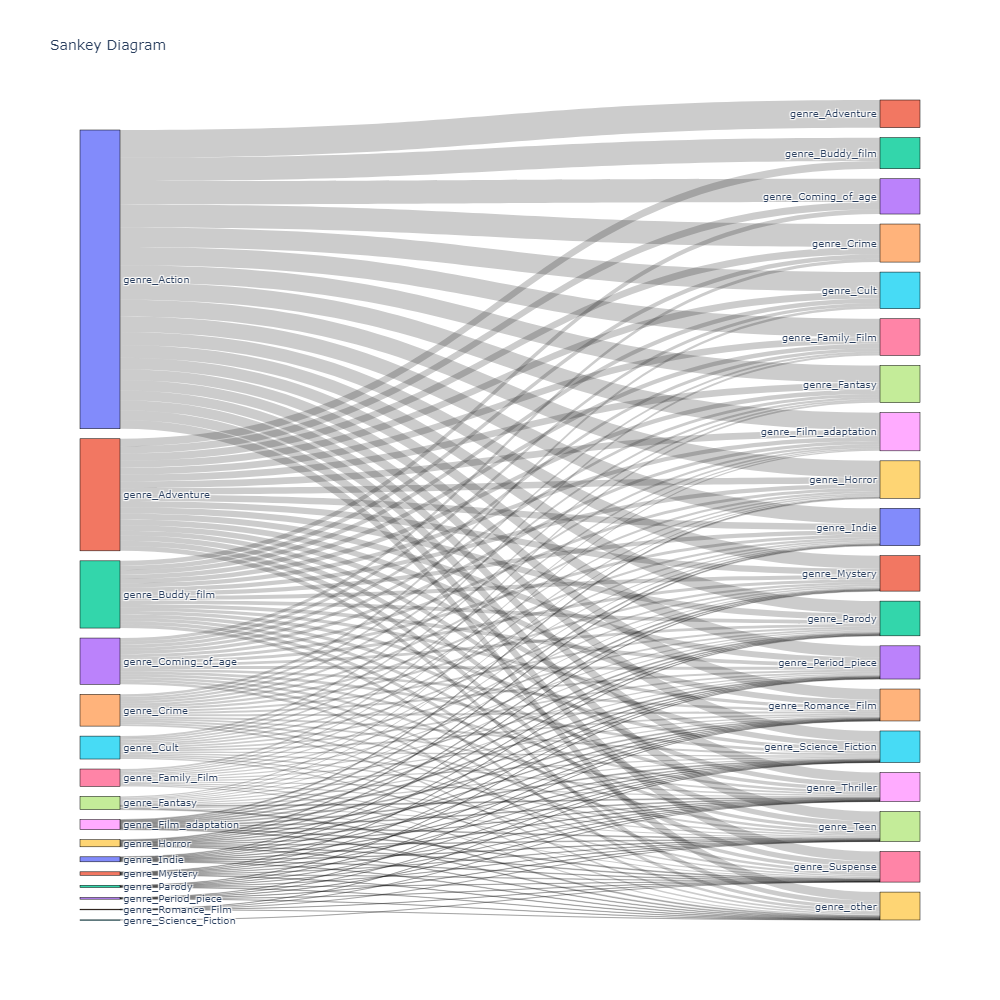

We also want to see the return on investment per genre to have an idea on which performs better.

In [156]:
#we explode our list of genres and consider only the 20 genres used for the one hot encoding
exploded = used_later.explode('movie_genres')
feats_k = [x[6:].replace("_", " ") for x in feats]
exploded['movie_genres'] = exploded['movie_genres'].apply(lambda x : x if (x in feats_k) else np.nan )
exploded=exploded.dropna()

In [157]:
#get mean values for each genre
df_means_genres = pd.DataFrame(data=exploded.groupby("movie_genres").mean())
df_means_genres = df_means_genres.drop(columns=["release_year"])
df_means_genres

,movie_runtime,MBO_revenue,budget,average_rating,num_votes,profit,weighted_rating,roi,genre_Action,genre_Adventure,...,genre_Indie,genre_Mystery,genre_Parody,genre_Period_piece,genre_Romance_Film,genre_Science_Fiction,genre_Suspense,genre_Teen,genre_Thriller,genre_other
movie_genres,,,,,,,,,,,,,,,,,,,,,
Action,111.421525,2.452933e+08,5.059013e+07,6.599103,243964.067265,1.947032e+08,6.594899,10.556310,1.000000,0.816143,...,0.071749,0.044843,0.053812,0.035874,0.071749,0.210762,0.035874,0.013453,0.600897,0.681614
Adventure,114.194690,2.667661e+08,4.672437e+07,6.610619,301925.672566,2.200417e+08,6.684840,5.439778,0.637168,1.000000,...,0.044248,0.061947,0.026549,0.070796,0.168142,0.247788,0.000000,0.106195,0.327434,0.699115
Buddy film,103.903846,2.114280e+08,3.217031e+07,6.717308,173667.365385,1.792576e+08,6.588975,7.885864,0.461538,0.480769,...,0.096154,0.038462,0.019231,0.019231,0.153846,0.057692,0.000000,0.096154,0.250000,0.596154
Coming of age,102.765625,1.116117e+08,1.482741e+07,6.885937,182882.593750,9.678427e+07,6.676004,11.677555,0.031250,0.093750,...,0.187500,0.000000,0.015625,0.140625,0.593750,0.000000,0.000000,0.546875,0.031250,0.500000
Crime,94.000000,9.318105e+06,2.502555e+06,4.900000,4880.000000,6.815550e+06,6.217877,2.723436,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Cult,96.370787,8.284022e+07,1.290321e+07,6.384270,121332.224719,6.993701e+07,6.424825,57.392025,0.101124,0.123596,...,0.179775,0.123596,0.067416,0.011236,0.089888,0.067416,0.022472,0.382022,0.224719,0.797753
Family Film,103.348315,2.159299e+08,3.103089e+07,6.282022,144855.595506,1.848990e+08,6.445743,7.147364,0.258427,0.516854,...,0.033708,0.022472,0.022472,0.033708,0.146067,0.168539,0.000000,0.112360,0.101124,0.685393
Fantasy,111.743590,2.832417e+08,4.993082e+07,6.703846,321382.692308,2.333109e+08,6.685319,6.155376,0.384615,0.512821,...,0.102564,0.115385,0.064103,0.051282,0.256410,0.205128,0.000000,0.089744,0.269231,0.641026
Film adaptation,124.047619,2.113702e+08,3.879584e+07,7.116667,283509.119048,1.728398e+08,6.815142,18409.125346,0.190476,0.273810,...,0.107143,0.142857,0.035714,0.297619,0.357143,0.083333,0.083333,0.071429,0.333333,0.607143


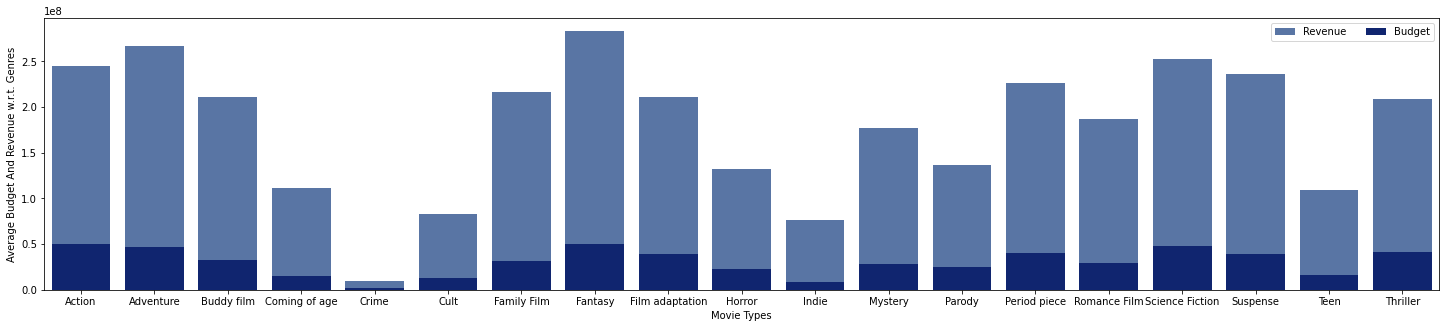

In [158]:
#plotting average budget and revenue for each genre
f, ax = plt.subplots(figsize=(25, 5))
sns.set_color_codes("deep")
sns.barplot(x=df_means_genres.index, ax=ax, y="MBO_revenue", data=df_means_genres, label="Revenue", color="b")
sns.set_color_codes("dark")
sns.barplot(x=df_means_genres.index, ax=ax, y="budget", data=df_means_genres, label="Budget", color="b")
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="Movie Types", ylabel="Average Budget And Revenue w.r.t. Genres")
plt.show()

In [159]:
# Create a bar chart
fig1 = px.bar(x=feats_k[:19], y=df_means_genres.roi.to_list())

# Update the layout to include a title and axis labels
fig1.update_layout(title='Return on investement for the Genre that affect the most our Revenue based on our regression',
                  xaxis_title='Movie genres',
                  yaxis_title='ROI Percentage')

# Show the plot
fig1.show()
plotly.offline.plot(fig1, filename="roi_per_genre.html")

'roi_per_genre.html'

This plot canno't be viewed wihout running the celle. Here is a picture of it.

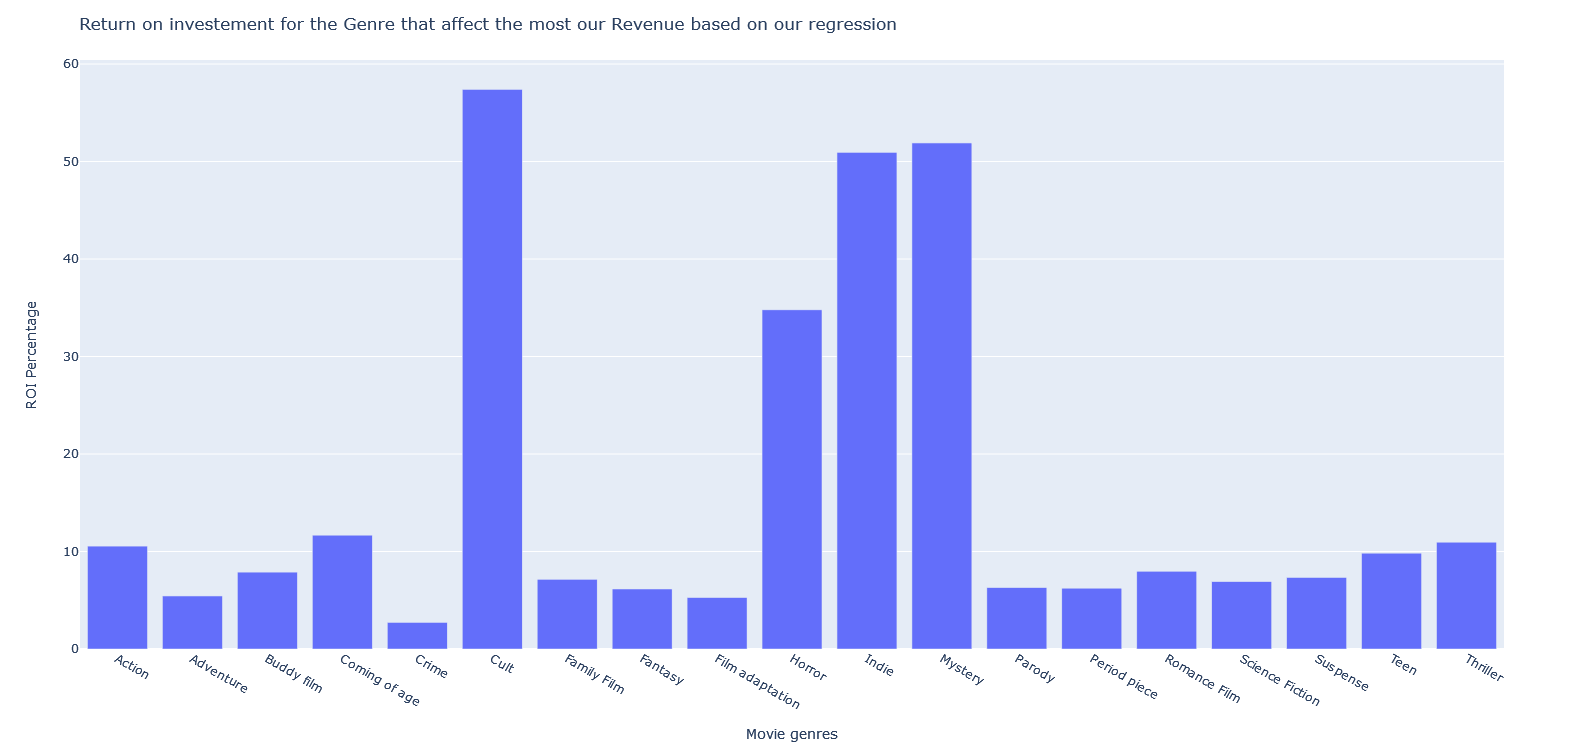

Now that we studied the effect of budget, genres, release_year and runtime on the revenue, we would like to target the effect actors can have on movies.

## Actors' effect on movies

In [44]:
#We get back the dataframe with the different features on actors 
df = pd.read_csv(our_folder+"Movies_with_nbactors.csv",index_col=0)
print(len(df))
df.head()

2397


,imdbID,Freebase movie ID,Movie name,Movie release date,Year released,Movie runtime,Movie genres,MBO_revenue,budget,averageRating,numVotes,Profit,weighted_rating,nb actors,diversity,nb_female,nb_male
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,97.0,"['Thriller', 'Crime Thriller', 'Horror', 'Psyc...",4.511683e+07,2.831896e+07,6.6,70424,1.679787e+07,6.397055,13,4,1,3
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,103.0,"['Crime Fiction', 'Mystery', 'Horror']",2.404963e+08,1.945688e+07,7.4,344034,2.210394e+08,7.116556,20,5,4,4
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,133.0,"['Thriller', 'Glamorized Spy Film', 'Action', ...",5.236253e+08,1.721176e+08,6.1,220386,3.515077e+08,6.159714,17,8,5,6
3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,104.0,"['Drama', 'Indie']",4.882577e+06,1.500000e+07,6.7,46022,-1.011742e+07,6.394890,25,5,3,2
4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,148.0,"['Thriller', 'Science Fiction', 'Adventure', '...",2.925873e+08,1.600000e+08,8.8,2334604,1.325873e+08,8.680734,15,8,2,7


In [45]:
df2 = df[df["nb_female"]+df["nb_male"]==df["nb actors"]]
len(df2)

11

As we can see from the two previous cells, when querying our data on actors, the data that we get is very noisy since there are a lot of nan values. When removing them, we have that for the majority of the movies the number of actors is not equal to the number of females actors + the number of male actors.
We decide to not investigate the effect of the gender of the casting in our analysis as we don't have enough data.   
Instead, we will investigate whether the fact that actors of a movie that have won prestigious awards affect its financial success

In [46]:
df_movies=df_one_hot.copy()
print(len(df_movies))
df_movies.head()

3376


,Imdb_id,Freebase movie ID,Movie name,Movie release date,release_year,movie_runtime,movie_genres,MBO_revenue,budget,average_rating,...,genre_Indie,genre_Mystery,genre_Parody,genre_Period_piece,genre_Romance_Film,genre_Science_Fiction,genre_Suspense,genre_Teen,genre_Thriller,genre_other
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,97.0,"[Thriller, Crime Thriller, Horror, Psychologic...",4.511683e+07,2.831896e+07,6.6,...,0,0,0,0,0,0,1,0,1,0
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,103.0,"[Crime Fiction, Mystery, Horror]",2.404963e+08,1.945688e+07,7.4,...,0,1,0,0,0,0,0,0,0,0
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,133.0,"[Thriller, Glamorized Spy Film, Action, Advent...",5.236253e+08,1.721176e+08,6.1,...,0,0,0,0,0,0,0,0,1,1
3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,104.0,"[Drama, Indie]",4.882577e+06,1.500000e+07,6.7,...,1,0,0,0,0,0,0,0,0,0
4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,148.0,"[Thriller, Science Fiction, Adventure, Psychol...",2.925873e+08,1.600000e+08,8.8,...,0,1,0,0,0,1,0,0,1,0


In [47]:
colnames1 = ["Wikipedia movie ID","Freebase movie ID","Movie release date","character name","actor date of birth","actor gender","actor height","actor ethnicity","actor name","actor age at movie release","freebase character/actor map id","freebase character id","freebase actor id"]
df_characters=pd.read_csv(cmu_folder+'character.metadata.tsv', sep="\t", names = colnames1)
df_characters=df_characters.dropna()
df_characters.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,character name,actor date of birth,actor gender,actor height,actor ethnicity,actor name,actor age at movie release,freebase character/actor map id,freebase character id,freebase actor id
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
56,2314463,/m/0734w5,2006,Taper Guy,1971-05-26,M,1.870,/m/033tf_,Matt Stone,34.0,/m/0cgn0lx,/m/0h0z488,/m/01_x6d
76,612710,/m/02wjqm,1999-10-01,Sandii,1975-09-20,F,1.680,/m/0222qb,Asia Argento,24.0,/m/02vcxk_,/m/0h2l6rx,/m/028pzq


***While trying to measure an actor popularity using the awards he won prior to the concerned movie, 
we will only consider the top5 famous awards using a query on Wikidata:  
Golden Globe Awards, British Academy Film Awards, Academy Awards, Screen Actors Guild Award and Critic's choice awards***

 
 
***
    SELECT ?actor ?actorLabel ?freebaseID ?date ?award ?awardstatement WHERE {

    VALUES ?best { wd:Q1011547 wd:Q732997 wd:Q19020 wd:Q268200 wd:Q7585305 wd:Q110145}   
    ?actor p:P646 [ps:P646 ?freebaseID].  
    ?actor wdt:P106 wd:Q10800557.  
    ?actor p:P166 ?awardstatement .  
    ?awardstatement ps:P166 ?award .  
    ?awardstatement pq:P585 ?date.  
    ?award wdt:P31/wdt:P279* ?best.  
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }  
    
    }  
    
***

In [48]:
#read file with actors' awards
df_awards=pd.read_csv(queries_folder+'query_actors_top5_awards.csv')
df_awards.head()

,actor,actorLabel,freebaseID,date,award,awardstatement
0,http://www.wikidata.org/entity/Q508329,Yvonne Mitchell,/m/03mh0b,1955-01-01T00:00:00Z,http://www.wikidata.org/entity/Q687123,http://www.wikidata.org/entity/statement/Q5083...
1,http://www.wikidata.org/entity/Q102813,Yul Brynner,/m/0gqrb,1956-01-01T00:00:00Z,http://www.wikidata.org/entity/Q103916,http://www.wikidata.org/entity/statement/Q1028...
2,http://www.wikidata.org/entity/Q491013,Youn Yuh-jung,/m/0b6kyrg,2021-01-01T00:00:00Z,http://www.wikidata.org/entity/Q106301,http://www.wikidata.org/entity/statement/Q4910...
3,http://www.wikidata.org/entity/Q491013,Youn Yuh-jung,/m/0b6kyrg,2021-01-01T00:00:00Z,http://www.wikidata.org/entity/Q1320315,http://www.wikidata.org/entity/statement/Q4910...
4,http://www.wikidata.org/entity/Q491013,Youn Yuh-jung,/m/0b6kyrg,2021-01-01T00:00:00Z,http://www.wikidata.org/entity/Q787123,http://www.wikidata.org/entity/statement/Q4910...


In [49]:
def change(x):
    x['date']= 1 if(x['date']<x['Movie release date']) else 0
    return x

In [50]:
#convert columns to datetime
df_awards['date'] = pd.to_datetime(pd.to_datetime(df_awards['date']).dt.date)
df_characters['Movie release date'] = pd.to_datetime(df_characters['Movie release date'])
#merge number of awards won to characters dataframe
df=df_characters.merge(df_awards,left_on='freebase actor id',right_on='freebaseID',how='left').drop(['actor','actorLabel','freebaseID','award','awardstatement'],axis=1)
df=df.fillna(pd.to_datetime('20300101', format='%Y%m%d'))
features = list(df.columns.drop('date'))
#keep only awards won prior to movie release
df=df.apply(change,axis=1) 
#count number of awards won for each actor
df=df.groupby(features,as_index=False).agg(sum)
df.rename(columns={'date':'major_awards_prior_movie'},inplace=True)
df

,Wikipedia movie ID,Freebase movie ID,Movie release date,character name,actor date of birth,actor gender,actor height,actor ethnicity,actor name,actor age at movie release,freebase character/actor map id,freebase character id,freebase actor id,major_awards_prior_movie
0,3217,/m/014hr,1992-10-09,Linda,1964-01-27,F,1.680,/m/07hwkr,Bridget Fonda,28.0,/m/0jtqtq,/m/0h2hxrl,/m/01yd8v,0
1,3217,/m/014hr,1992-10-09,Sheila,1965-08-11,F,1.730,/m/06v41q,Embeth Davidtz,27.0,/m/0jtqtk,/m/0h36j9w,/m/034b7r,0
2,3746,/m/017n9,1982-06-25,Gaff,1947-02-24,M,1.770,/m/01g7zj,Edward James Olmos,35.0,/m/0jvhc2,/m/02nwbs8,/m/016yr0,0
3,3746,/m/017n9,1982-06-25,Rick Deckard,1942-07-13,M,1.850,/m/01qhm_,Harrison Ford,39.0,/m/0jvhbm,/m/08zbgl,/m/0c0k1,0
4,3746,/m/017n9,1982-06-25,Roy Batty,1944-01-23,M,1.850,/m/05l3g_,Rutger Hauer,38.0,/m/0jvhbs,/m/02nb0hy,/m/09byk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45259,37196243,/m/0n4zpt9,2012-10-06,Joy White,1967-04-22,F,1.549,/m/0x67,Sherri Shepherd,45.0,/m/0n4zzv4,/m/0n4zzv7,/m/0c33pl,0
45260,37322106,/m/0hzp_vq,2012-11-13,Major Samar,1965-11-02,M,1.730,/m/09743,Shahrukh Khan,47.0,/m/0j34yb2,/m/0mv6f_c,/m/01zh29,0
45261,37373877,/m/02vr316,2006-10-31,Beth Patterson,1970-02-04,F,1.600,/m/03w9bjf,Gabrielle Anwar,36.0,/m/03js7xs,/m/0gydnxw,/m/03s_y5,0
45262,37478048,/m/0g57c0y,1996-01-01,Ajay,1959-08-29,M,1.830,/m/09m6hr,Akkineni Nagarjuna,36.0,/m/0gw442b,/m/0h18dfy,/m/06pwf6,0


It results in the following mappings, for example for movies including Al Pacino as an actor:

In [51]:
df_awards[df_awards['actorLabel']=='Al Pacino']

,actor,actorLabel,freebaseID,date,award,awardstatement
687,http://www.wikidata.org/entity/Q41163,Al Pacino,/m/0bj9k,1993-01-01,http://www.wikidata.org/entity/Q103916,http://www.wikidata.org/entity/statement/Q4116...
688,http://www.wikidata.org/entity/Q41163,Al Pacino,/m/0bj9k,1976-01-01,http://www.wikidata.org/entity/Q400007,http://www.wikidata.org/entity/statement/q4116...
689,http://www.wikidata.org/entity/Q41163,Al Pacino,/m/0bj9k,2004-01-01,http://www.wikidata.org/entity/Q251542,http://www.wikidata.org/entity/statement/Q4116...
690,http://www.wikidata.org/entity/Q41163,Al Pacino,/m/0bj9k,2011-01-01,http://www.wikidata.org/entity/Q251542,http://www.wikidata.org/entity/statement/Q4116...


In [52]:
df[df['actor name']=='Al Pacino']

,Wikipedia movie ID,Freebase movie ID,Movie release date,character name,actor date of birth,actor gender,actor height,actor ethnicity,actor name,actor age at movie release,freebase character/actor map id,freebase character id,freebase actor id,major_awards_prior_movie
403,43566,/m/0bxsk,1995-12-15,Lt. Vincent Hanna,1940-04-25,M,1.7,/m/0xnvg,Al Pacino,55.0,/m/0jz8sk,/m/0h60x39,/m/0bj9k,2
836,73875,/m/0jsf6,1974-12-12,Michael Corleone,1940-04-25,M,1.7,/m/0xnvg,Al Pacino,34.0,/m/0k56hx,/m/02p1jd,/m/0bj9k,0
1231,101914,/m/0ptx_,1975-01-01,Sonny,1940-04-25,M,1.7,/m/0xnvg,Al Pacino,34.0,/m/0jxdcl,/m/02nwdcx,/m/0bj9k,0
1439,129644,/m/0y_yw,1990-12-20,Michael Corleone,1940-04-25,M,1.7,/m/0xnvg,Al Pacino,50.0,/m/0k56l4,/m/02p1jd,/m/0bj9k,1
1466,133648,/m/0_9wr,1992-12-23,Lt. Col. Frank Slade,1940-04-25,M,1.7,/m/0xnvg,Al Pacino,52.0,/m/0k2z79,/m/02nwlv3,/m/0bj9k,1
1577,142469,/m/011yth,1999-10-28,Lowell Bergman,1940-04-25,M,1.7,/m/0xnvg,Al Pacino,59.0,/m/0k5gzt,/m/0c1ms75,/m/0bj9k,2
1869,163459,/m/015qsq,1973-12-05,Frank Serpico,1940-04-25,M,1.7,/m/0xnvg,Al Pacino,33.0,/m/0k31td,/m/02nw8ps,/m/0bj9k,0
1884,164387,/m/015wmg,1979-06-29,Arthur Kirkland,1940-04-25,M,1.7,/m/0xnvg,Al Pacino,39.0,/m/0jshhb,/m/02nw965,/m/0bj9k,1
2552,222500,/m/01gglm,1999-12-16,Tony D'Amato,1940-04-25,M,1.7,/m/0xnvg,Al Pacino,59.0,/m/0jtnlq,/m/0g_sv3h,/m/0bj9k,2
2999,267848,/m/01nln3,1983-12-01,Tony Montana,1940-04-25,M,1.7,/m/0xnvg,Al Pacino,43.0,/m/02_8_nx,/m/02t4sm,/m/0bj9k,1


In [53]:
#number of major awards won per movie
num_awards = pd.DataFrame(data=df.groupby("Freebase movie ID")["major_awards_prior_movie"].sum())
num_awards

,major_awards_prior_movie
Freebase movie ID,
/m/011wtv,1
/m/011x_4,0
/m/011xg5,8
/m/011xrr,0
/m/011ycb,1
...,...
/m/0yyn5,2
/m/0yyts,0
/m/0yzbg,0


In [54]:
#merge with the movies data frame
df1 = df_movies.merge(num_awards, on="Freebase movie ID")
print(len(df1))
df1.head()

2965


,Imdb_id,Freebase movie ID,Movie name,Movie release date,release_year,movie_runtime,movie_genres,MBO_revenue,budget,average_rating,...,genre_Mystery,genre_Parody,genre_Period_piece,genre_Romance_Film,genre_Science_Fiction,genre_Suspense,genre_Teen,genre_Thriller,genre_other,major_awards_prior_movie
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,97.0,"[Thriller, Crime Thriller, Horror, Psychologic...",4.511683e+07,2.831896e+07,6.6,...,0,0,0,0,0,1,0,1,0,0
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,103.0,"[Crime Fiction, Mystery, Horror]",2.404963e+08,1.945688e+07,7.4,...,1,0,0,0,0,0,0,0,0,0
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,133.0,"[Thriller, Glamorized Spy Film, Action, Advent...",5.236253e+08,1.721176e+08,6.1,...,0,0,0,0,0,0,0,1,1,3
3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,104.0,"[Drama, Indie]",4.882577e+06,1.500000e+07,6.7,...,0,0,0,0,0,0,0,0,0,0
4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,148.0,"[Thriller, Science Fiction, Adventure, Psychol...",2.925873e+08,1.600000e+08,8.8,...,1,0,0,0,1,0,0,1,0,0


In [55]:
stats.spearmanr(df1["major_awards_prior_movie"],df1["MBO_revenue"])

SpearmanrResult(correlation=0.1998214153655977, pvalue=4.41191353621494e-28)

The MBO revenue and the number of prestigious awards won by the actors prior to the release are correlated. The p-value is small enough (<0.05) to tell that it is statistically significant.

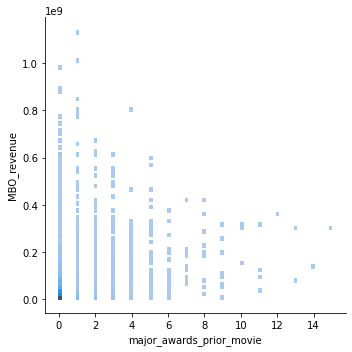

In [56]:
sns.displot(data=df1, y='MBO_revenue', x ='major_awards_prior_movie')
plt.show()

From a first plot, it would like that the number of awards wons does not increase with revenue.   
As good Ada students, we will have a look at the distribution.

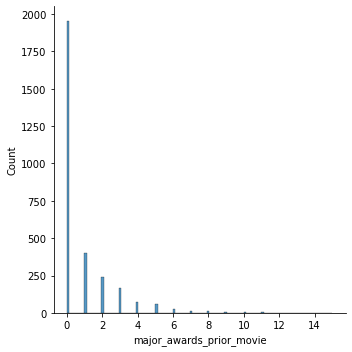

In [57]:
sns.displot(data=df1, x='major_awards_prior_movie')
plt.show()

There is much more movies without prestigious actors in our dataset. Hence, we will encode the feature as a categorical variable : 1 if there is one or more prestigious awards, 0 if not and have a look at the distributions of main features.

<AxesSubplot:title={'center':'budget'}, xlabel='major_awards_prior_movie'>

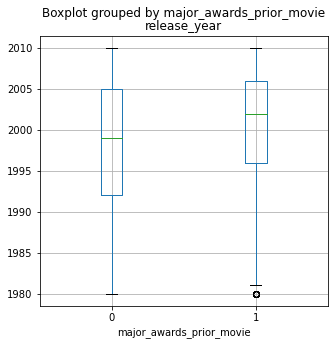

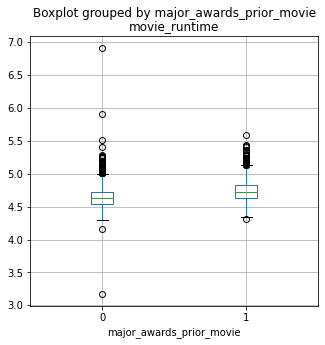

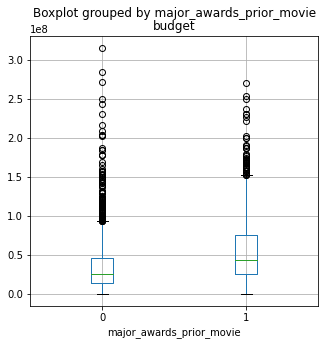

In [58]:
df2=df1.copy()
df2['major_awards_prior_movie']=df2['major_awards_prior_movie'].apply(lambda x : 1 if x>0 else 0)
#log to have a better plot
df2['movie_runtime']=np.log(df2['movie_runtime'])
df2.boxplot(by='major_awards_prior_movie', column='release_year', figsize = [5, 5], grid=True)
df2.boxplot(by='major_awards_prior_movie', column='movie_runtime', figsize = [5, 5], grid=True)
df2.boxplot(by='major_awards_prior_movie', column='budget', figsize = [5, 5], grid=True)

The dataset looks unbalanced. To deal with that, we will perform a propensity score matching on our features, with an exact matching on genres.

In [59]:
colnames =  ["Imdb_id","Freebase movie ID","Movie name","Movie release date","release_year","movie_runtime","movie_genres","MBO_revenue","budget","average_rating","num_votes","profit","weighted_rating"]
genres=df1.columns.drop(colnames).drop('roi').drop('major_awards_prior_movie').to_list()

We will perform logistic regression to get the propensity scores

In [60]:
other_vars = ['budget', 'release_year', 'movie_runtime']

df = df1.copy()

#standardize continuous inputs 
for var in other_vars :
    df[var]=(df[var]-df[var].mean())/df[var].std()


df['major_awards_prior_movie']=df['major_awards_prior_movie'].apply(lambda x : 1 if x>0 else 0)
dependent_variable = 'major_awards_prior_movie'
# Specify the independent variables (one hot encoded genres, budget, release year, runtime)
features = genres + other_vars 
# Fit the multiple regression model
mod = smf.logit(f"{dependent_variable} ~ {' + '.join(other_vars)} + C({') + C('.join(genres)})", data=df)
res = mod.fit()
df['Propensity_score'] = res.predict()
res.summary()

Optimization terminated successfully.
         Current function value: 0.564790
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                              
====================================================================================
Dep. Variable:     major_awards_prior_movie   No. Observations:                 2965
Model:                                Logit   Df Residuals:                     2941
Method:                                 MLE   Df Model:                           23
Date:                      Fri, 23 Dec 2022   Pseudo R-squ.:                  0.1201
Time:                              21:34:30   Log-Likelihood:                -1674.6
converged:                             True   LL-Null:                       -1903.2
Covariance Type:                  nonrobust   LLR p-value:                 2.614e-82
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.4016      0.107     -3.755      0.000      -0.611      -0.192
C(genre_Action)[T.1]             -0.5566      0.153     -3.630      0.000      -0.857      -0.256
C(genre_Adventure)[T.1]          -0.2294      0.150     -1.527      0.127      -0.524       0.065
C(genre_Buddy_film)[T.1]         -0.2955      0.209     -1.411      0.158      -0.706       0.115
C(genre_Coming_of_age)[T.1]      -0.3705      0.230     -1.613      0.107      -0.821       0.080
C(genre_Crime)[T.1]               0.2223      0.114      1.943      0.052      -0.002       0.447
C(genre_Cult)[T.1]               -0.1825      0.267     -0.683      0.495      -0.706       0.341
C(genre_Family_Film)[T.1]        -0.1730      0.155     -1.120      0.263      -0.476       0.130
C(genre_Fantasy)[T.1]            -0.0190      0.149     -0.127      0.899      -0.312       0.274
C(genre_Film_adaptation)[T.1]     0.4224      0.138      3.065      0.002       0.152       0.692
C(genre_Horror)[T.1]             -0.6980      0.170     -4.117      0.000      -1.030      -0.366
C(genre_Indie)[T.1]              -0.1542      0.138     -1.115      0.265      -0.425       0.117
C(genre_Mystery)[T.1]             0.0897      0.150      0.599      0.549      -0.204       0.383
C(genre_Parody)[T.1]             -0.4303      0.223     -1.926      0.054      -0.868       0.008
C(genre_Period_piece)[T.1]        0.2953      0.143      2.064      0.039       0.015       0.576
C(genre_Romance_Film)[T.1]        0.1606      0.108      1.480      0.139      -0.052       0.373
C(genre_Science_Fiction)[T.1]    -0.1641      0.152     -1.080      0.280      -0.462       0.134
C(genre_Suspense)[T.1]            0.0409      0.193      0.213      0.832      -0.337       0.418
C(genre_Teen)[T.1]               -1.6431      0.292     -5.618      0.000      -2.216      -1.070
C(genre_Thriller)[T.1]           -0.0794      0.123     -0.646      0.518      -0.320       0.162
C(genre_other)[T.1]               0.0496      0.090      0.550      0.582      -0.127       0.226
budget                            0.5255      0.055      9.558      0.000       0.418       0.633
release_year                      0.2394      0.045      5.341      0.000       0.152       0.327
movie_runtime                     0.2125      0.065      3.289      0.001       0.086       0.339
=================================================================================================
"""

In [42]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [43]:
major_df = df[df['major_awards_prior_movie'] == 1]
no_major_df = df[df['major_awards_prior_movie'] == 0]

G = nx.Graph()

for no_major_id, no_major_row in no_major_df.iterrows():
    for major_id, major_row in major_df.iterrows(): 
        #if same genre, make the matching
        if(major_row[genres].equals(no_major_row[genres])) :
            similarity = get_similarity(no_major_row['Propensity_score'],
                                        major_row['Propensity_score'])
            G.add_weighted_edges_from([(no_major_id, major_id, similarity)])

matching = nx.max_weight_matching(G)
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]


In [102]:
balanced=pd.read_csv(our_folder+'balanced.csv',index_col=0)
#to get back initial continous values
balanced = df2.loc[balanced.index]
#get back the categorical values
#balanced['major_awards_prior_movie']=balanced['major_awards_prior_movie'].apply(lambda x : 1 if x>1 else 0)
print(len(balanced))
balanced.head()

1446


,Imdb_id,Freebase movie ID,Movie name,Movie release date,release_year,movie_runtime,movie_genres,MBO_revenue,budget,average_rating,...,genre_Mystery,genre_Parody,genre_Period_piece,genre_Romance_Film,genre_Science_Fiction,genre_Suspense,genre_Teen,genre_Thriller,genre_other,major_awards_prior_movie
347,tt0429493,/m/07_k0c0,The A-Team,2010-06-03,2010,4.890349,"[Action/Adventure, Thriller, Action, Adventure]",1.772388e+08,1.100000e+08,6.7,...,0,0,0,0,0,0,0,1,0,0
36,tt0120338,/m/0dr_4,Titanic,1997-11-01,1997,5.267858,"[Tragedy, Costume drama, Historical fiction, A...",8.958147e+08,2.717209e+08,7.9,...,0,0,1,1,0,0,0,0,1,0
364,tt0373926,/m/05k2xy,The Interpreter,2005-04-04,2005,4.852030,"[Thriller, Mystery, Drama, Political thriller]",1.819310e+08,8.932145e+07,6.4,...,1,0,0,0,0,0,0,1,0,1
257,tt1386588,/m/087vnr5,The Other Guys,2010-08-02,2010,5.411646,"[Parody, Crime Fiction, Absurdism, Action/Adve...",1.704329e+08,1.000000e+08,6.6,...,0,1,0,0,0,0,0,0,1,1
210,tt0429277,/m/026wx2y,Zyzzyx Road,2006-02-25,2006,4.499810,"[Thriller, Indie, Psychological thriller, Dram...",3.244881e+01,2.163254e+06,3.9,...,0,0,0,0,0,1,0,1,0,0


In [109]:
df=balanced
# Calculate the mean ROI percentage for each group
notorious_mean = df[df.major_awards_prior_movie == 1]['roi'].mean()
non_notorious_mean = df[df.major_awards_prior_movie == 0]['roi'].mean()

# Create a bar chart
fig = px.bar(x=['without prestigious actors','with prestigious actors'], y=[non_notorious_mean, notorious_mean])

fig.update_layout(title='Effect of Notorious Actors on ROI Percentage',
                  xaxis_title='Actor Cast',
                  yaxis_title='ROI Percentage')

fig.show()


In order to see this interactive, you should run the notebook.    
Here is a picture of the plot.       

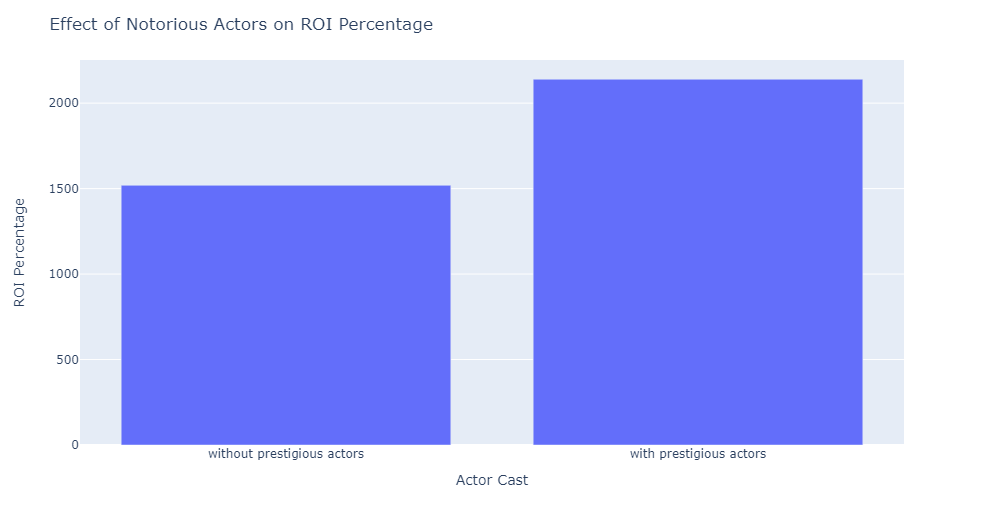

Movies with actors who won prestigious awards have a higher mean return on investment (2139) than the other movies (1519).    
Our results support the positive effect of having prestigious actors in a cast.    